You can edit this notebook after copying to your drive.  
Click "Playgroundで開く" above and try them!  
  
(C) 2019 Tokyo Institute of Technology All Rights Reserved.  
@author Tatsuya Hiraoka  

# classifier example

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

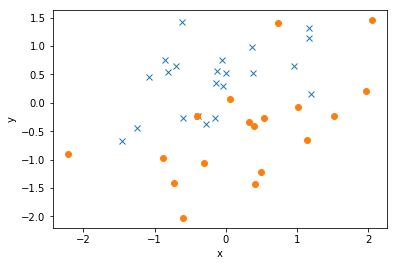

In [2]:
# prepare dataset
np.random.seed(777)
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)
lam = 0.01
x = np.random.randn(n, 2)
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'loss')

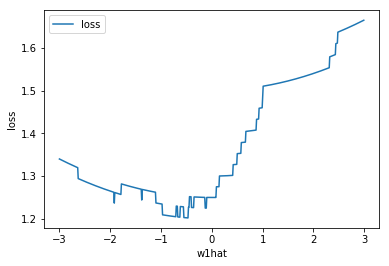

In [7]:
# loss example
k = 3
w1hat = np.arange(-k, k, 0.01)
lss = np.zeros(w1hat.shape)
loglss = np.zeros(w1hat.shape)
lslss = np.zeros(w1hat.shape)
for i in range(len(w1hat)):
  lss[i] = 1/n * np.sum(y * (w1hat[i]*x[:,0]+x[:,1]) < 0 ) + lam * w1hat[i]*w1hat[i]+1 
  loglss[i] = 1/n  * np.sum(np.log(1 + np.exp(-y * (w1hat[i] * x[:,0] + x[:,1])))) + lam* (w1hat[i] * w1hat[i] + 1)
  lslss[i] = 1/n * np.sum((y - (w1hat[i] * x[:,0] + x[:,1]))**2) + lam * (w1hat[i] * w1hat[i] + 1)
  
plt.plot(w1hat, lss, label='loss')
# plt.plot(w1hat, loglss, label='log_loss')
# plt.plot(w1hat, lslss, label='lsloss')

plt.legend()
plt.xlabel('w1hat')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

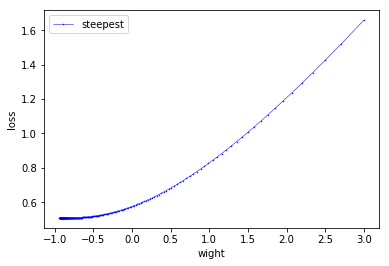

In [13]:
## gradient discent
num_iter = 300
ww = 3
alpha_base = 1
ll_history = []
ww_history = []
lip = 0.25 * max(x[:,0]**2);

for t in range(1,num_iter+1):
    posterior = 1 / (1 + np.exp(-y * (ww * x[:,0] + x[:, 1])));
    direction =  1 / n * np.sum((1 - posterior) * y * x[:,0]) + 2 * lam * ww
    ll = 1/n  * np.sum(np.log(1 + np.exp(-y * (ww * x[:,0] + x[:,1])))) + lam * (ww**2 + 1)
    ww_history.append(ww);
    ll_history.append(ll);
    ww = ww + alpha_base * 1.0 / np.sqrt(t) / lip * direction;

plt.plot(ww_history, ll_history, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.legend()
plt.xlabel('wight')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

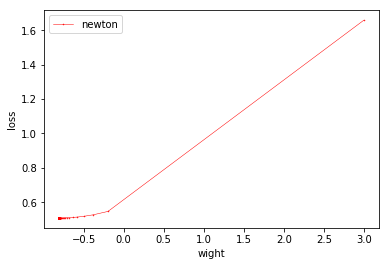

In [14]:
# newton
ll_n_history = np.zeros(num_iter)
ww_n_history = np.zeros(num_iter)
ww = 3

for t in range(num_iter):
    posterior = 1 / (1 + np.exp(-y * (ww * x[:,0] + x[:,1])))
    
    grad = 1 / n * np.sum((1 - posterior) * (-y) * x[:,0]) + 2 * lam * ww
    hess = 1 / n * np.sum(posterior * (1 - posterior) * x[:,0]**2) + 2 * lam
    ll = 1/n  * np.sum(np.log(1.0 + np.exp(-y * (ww * x[:,0] + x[:,1])))) + lam * (ww**2 + 1)
    ww_n_history[t] =  ww
    ll_n_history[t] = ll
    ww = ww - grad/hess * 1.0 / np.sqrt(t+10)

plt.plot(ww_n_history, ll_n_history, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('wight')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

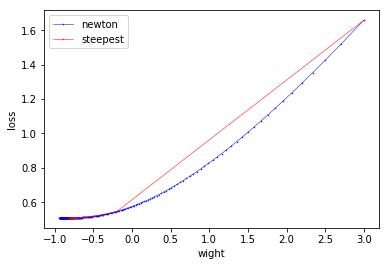

In [16]:
# compare
plt.plot(ww_history, ll_history, 'bo-', linewidth=0.5, markersize=0.5, label='newton')
plt.plot(ww_n_history, ll_n_history, 'ro-', linewidth=0.5, markersize=0.5, label='steepest')
plt.legend()
plt.xlabel('wight')
plt.ylabel('loss')

Text(0, 0.5, 'diff from the gold weight')

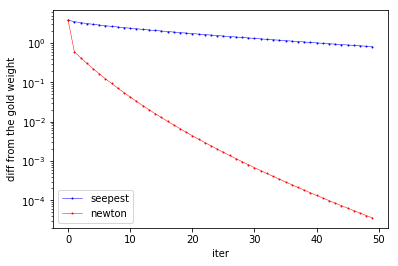

In [17]:
# diff
show_iter = 50
plt.plot(np.abs(ww_history[:show_iter] - ww), 'bo-', linewidth=0.5, markersize=1, label='seepest')
plt.plot(np.abs(ww_n_history[:show_iter] - ww), 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend()
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('diff from the gold weight')

Text(0, 0.5, 'diff from the gold weight')

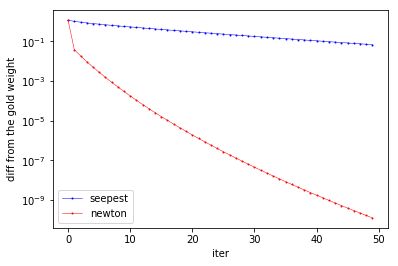

In [18]:
# f_min
min_ll = min(min(ll_n_history), min(ll_history))

plt.plot(np.abs(ll_history[:show_iter] - min_ll), 'bo-', linewidth=0.5, markersize=1, label='seepest')
plt.plot(np.abs(ll_n_history[:show_iter] - min_ll), 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend()
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('diff from the gold weight')